##Question # 3 
(Library Implementation)

##Question # 2

In [1]:
import numpy as np
import tarfile
import os
import shutil
import re 
from collections import Counter
from collections import OrderedDict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import random

if(os.path.exists("./languageID")):
  shutil.rmtree("./languageID")
file = tarfile.open('languageID.tgz')
file.extractall('.')  
file.close()

####part 1

In [2]:
##Build training data

def func_build_data(path, train=True):
  labels=[]
  data=[]
  filenames=[]
  for filename in os.listdir(path):
    if(train==True):
      if(filename[1].isdigit() and filename[2] =='.'):
        x_ij=list(open(path+filename).read())
        x_ij=list(filter(('\n').__ne__, x_ij))
        data.append(x_ij)
        labels.append(filename[0])
        filenames.append(filename)
    else:
      if(filename[1:2].isdigit() and filename[3] =='.'):
        x_ij=list(open(path+filename).read())
        x_ij=list(filter(('\n').__ne__, x_ij))
        data.append(x_ij)
        labels.append(filename[0])
        filenames.append(filename)


  return data, labels, filenames

path= './languageID/'
train_data, train_labels, train_filenames = func_build_data(path, True)


def func_prior(labels, alpha, KL, y ):
  occurences=Counter(labels)
  prior = (occurences[y]+alpha)/((len(labels)+(KL*alpha)))
  return prior

prior_e = func_prior(train_labels, 0.5, 3, 'e')
prior_j = func_prior(train_labels, 0.5, 3, 'j')
prior_s = func_prior(train_labels, 0.5, 3, 's')

print("Prior probability of p(y=e): ", prior_e)
print("Prior probability of p(y=s): ", prior_j)
print("Prior probability of p(y=j): ", prior_s)

Prior probability of p(y=e):  0.3333333333333333
Prior probability of p(y=s):  0.3333333333333333
Prior probability of p(y=j):  0.3333333333333333


####part 2

In [3]:
S = [' ','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
def func_class_conditional_probab(S, alpha, data, labels, y):
  theta=[]
  KS=len(S)
  sum_all=0
  for ci in S:
    sum=0
    for i,ck in enumerate(labels):
      occurences=Counter(data[i])
      if(ck==y):
        #print(filenames[i])
        #print(occurences)
        sum+=occurences[ci]
        #print(sum)
        sum_all+=occurences[ci]
    theta.append(sum)
    #break
  theta = list(map(lambda x:((x+alpha)/(sum_all + (KS*alpha))), theta))
  return theta

theta_e = func_class_conditional_probab(S, 0.5, train_data, train_labels, 'e')
print("The class conditional probabilities for English (theta_e): \n", theta_e)


The class conditional probabilities for English (theta_e): 
 [0.1792499586981662, 0.0601685114819098, 0.011134974392863043, 0.021509995043779945, 0.021972575582355856, 0.1053692383941847, 0.018932760614571286, 0.017478936064761277, 0.047216256401784236, 0.055410540227986124, 0.001420783082768875, 0.0037336857756484387, 0.028977366595076822, 0.020518751032545846, 0.057921691723112505, 0.06446390219725756, 0.01675202378985627, 0.0005617049396993227, 0.053824549810011564, 0.06618205848339666, 0.08012555757475633, 0.026664463902197257, 0.009284652238559392, 0.015496448042293078, 0.001156451346439782, 0.013844374690236246, 0.0006277878737815959]


####part 3

In [4]:
theta_j = func_class_conditional_probab(S, 0.5, train_data, train_labels, 'j')
print("The class conditional probabilities for Japanese (theta_j): \n", theta_j)

theta_s = func_class_conditional_probab(S, 0.5, train_data, train_labels, 's')
print("The class conditional probabilities for Spanish (theta_s): \n", theta_s)

The class conditional probabilities for Japanese (theta_j): 
 [0.12344945665466997, 0.1317656102589189, 0.010866906600510151, 0.005485866033054963, 0.01722631818022992, 0.06020475907613823, 0.003878542227191726, 0.014011670568503443, 0.03176211607673224, 0.09703343932352633, 0.0023411020650616725, 0.05740941332681086, 0.001432614696530277, 0.03979873510604843, 0.05671057688947902, 0.09116321324993885, 0.0008735455466648031, 0.00010482546559977637, 0.04280373178657535, 0.0421747789929767, 0.056990111464411755, 0.07061742199238269, 0.0002445927530661449, 0.01974212935462455, 3.4941821866592126e-05, 0.01415143785596981, 0.00772214263251686]
The class conditional probabilities for Spanish (theta_s): 
 [0.16826493170115014, 0.10456045141993771, 0.008232863618143134, 0.03752582405722919, 0.039745922111559924, 0.1138108599796491, 0.00860287996053159, 0.0071844839813758445, 0.0045327001942585795, 0.049859702136844375, 0.006629459467793161, 0.0002775122567913416, 0.052943171656748174, 0.0258086

###part 4

In [5]:
def func_xtest_count(filename):
  x=list(open(path+filename).read())
  x=list(filter(('\n').__ne__, x))
  counts=Counter(x)
  x_dict = OrderedDict(sorted(counts.items()))
  return x, x_dict

x, x_dict = func_xtest_count('e10.txt')
print("X vector without counts: ",x)
print("x vector with counts: ",x_dict)

X vector without counts:  ['e', 'x', 'c', 'e', 'p', 't', ' ', 'w', 'h', 'e', 'n', ' ', 't', 'h', 'e', ' ', 'w', 'i', 'n', 'd', 's', ' ', 'r', 'i', 's', 'e', ' ', 't', 'o', ' ', 'a', ' ', 'h', 'i', 'g', 'h', ' ', 's', 'p', 'e', 'e', 'd', ' ', 'w', 'e', ' ', 's', 'e', 'e', 'm', ' ', 't', 'o', ' ', 'l', 'i', 'v', 'e', ' ', 'i', 'n', ' ', 'a', ' ', 'v', 'e', 'r', 'y', ' ', 't', 'r', 'a', 'n', 'q', 'u', 'i', 'l', ' ', 'w', 'o', 'r', 'l', 'd', ' ', 'a', 't', ' ', 'n', 'i', 'g', 'h', 't', ' ', 'w', 'h', 'e', 'n', ' ', 't', 'h', 'e', ' ', 'g', 'l', 'a', 'r', 'e', ' ', 'o', 'f', ' ', 't', 'h', 'e', ' ', 's', 'u', 'n', ' ', 'p', 'a', 's', 's', 'e', 's', ' ', 'o', 'u', 't', ' ', 'o', 'f', ' ', 'o', 'u', 'r', ' ', 'a', 't', 'm', 'o', 's', 'p', 'h', 'e', 'r', 'e', ' ', 't', 'h', 'e', ' ', 's', 't', 'a', 'r', 's', ' ', 'a', 'n', 'd', ' ', 'p', 'l', 'a', 'n', 'e', 't', 's', ' ', 's', 'e', 'e', 'm', ' ', 't', 'o', ' ', 'm', 'o', 'v', 'e', ' ', 'a', 'c', 'r', 'o', 's', 's', ' ', 't', 'h', 'e', ' ', 'h'

####part 5

In [6]:

###
####with logspace
###

def func_log_probab_likelihood(S, class_conditional_probability, x_dict):
  log_probab_likelihood=0
  theta_log=np.log(class_conditional_probability)
  theta_dict = {k:v for k,v in zip(S,theta_log)}
  for char in x_dict:
    log_probab_likelihood+=(x_dict[char]*theta_dict[char])
  return log_probab_likelihood


log_probab_e = func_log_probab_likelihood(S, theta_e ,x_dict)
log_probab_j = func_log_probab_likelihood(S, theta_j ,x_dict)
log_probab_s = func_log_probab_likelihood(S, theta_s ,x_dict)

print("log probability p(x|y=e): ",log_probab_e)
print("log probability p(x|y=j): ",log_probab_j)
print("log probability p(x|y=s): ",log_probab_s)

log probability p(x|y=e):  -7841.865447060634
log probability p(x|y=j):  -8771.433079075034
log probability p(x|y=s):  -8467.282044010557


####part 6

In [7]:
def func_posterior(prior, log_proab_likelihood):
  return prior*log_proab_likelihood

posterior_e = func_posterior(prior_e , log_probab_e)
posterior_j = func_posterior(prior_j , log_probab_j)
posterior_s = func_posterior(prior_s , log_probab_s)
print("posterior log probability p(y=e | x): ", posterior_e)
print("posterior log probability p(y=j | x): ", posterior_j)
print("posterior log probability p(y=s | x): ", posterior_s)

posterior log probability p(y=e | x):  -2613.955149020211
posterior log probability p(y=j | x):  -2923.8110263583444
posterior log probability p(y=s | x):  -2822.427348003519


In [8]:
def func_predict(posteriors):
  index = np.argmax(posteriors)
  if(index == 0):
    return 'e'
  elif(index == 1):
    return 'j'
  elif(index == 2):
    return 's'

pred = func_predict([posterior_e, posterior_j, posterior_s])
print("predicted label of the test file (e10.txt): ", pred)


predicted label of the test file (e10.txt):  e


####part 7

In [9]:
def test_predictions(path, theta_e, theta_j, theta_s):
  _ , test_labels, test_filenames = func_build_data(path, False)
  pred_labels=[]
  for each_file in test_filenames:
    x, x_dict = func_xtest_count(each_file)
    log_probab_e = func_log_probab_likelihood(S, theta_e ,x_dict)
    log_probab_j = func_log_probab_likelihood(S, theta_j ,x_dict)
    log_probab_s = func_log_probab_likelihood(S, theta_s ,x_dict)
    posterior_e = func_posterior(prior_e , log_probab_e)
    posterior_j = func_posterior(prior_j , log_probab_j)
    posterior_s = func_posterior(prior_s , log_probab_s)
    pred = func_predict([posterior_e, posterior_j, posterior_s])
    pred_labels.append(pred)
  return test_labels, pred_labels

Text(0, 0.5, 'Predicted labels')

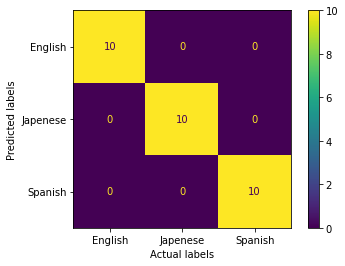

In [10]:
test, pred = test_predictions(path, theta_e, theta_j, theta_s)

cm = confusion_matrix(test, pred,labels=['e', 'j', 's'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['English', 'Japenese', 'Spanish'])

disp.plot()
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')

####part 8

In [11]:
##shuffling document 
test_filename = 'j17.txt'
x_test=list(open(path+test_filename).read())
random.shuffle(x_test)
x_test=list(filter(('\n').__ne__, x_test))
counts=Counter(x_test)
x_test_dict = OrderedDict(sorted(counts.items()))
log_probab_e = func_log_probab_likelihood(S, theta_e ,x_test_dict)
log_probab_j = func_log_probab_likelihood(S, theta_j ,x_test_dict)
log_probab_s = func_log_probab_likelihood(S, theta_s ,x_test_dict)
posterior_e = func_posterior(prior_e , log_probab_e)
posterior_j = func_posterior(prior_j , log_probab_j)
posterior_s = func_posterior(prior_s , log_probab_s)
pred = func_predict([posterior_e, posterior_j, posterior_s])
print("predicted label of the random test file (j17.txt): ", pred)

predicted label of the random test file (j17.txt):  j


##Question # 3

####self implementation

#####Backprop implementation
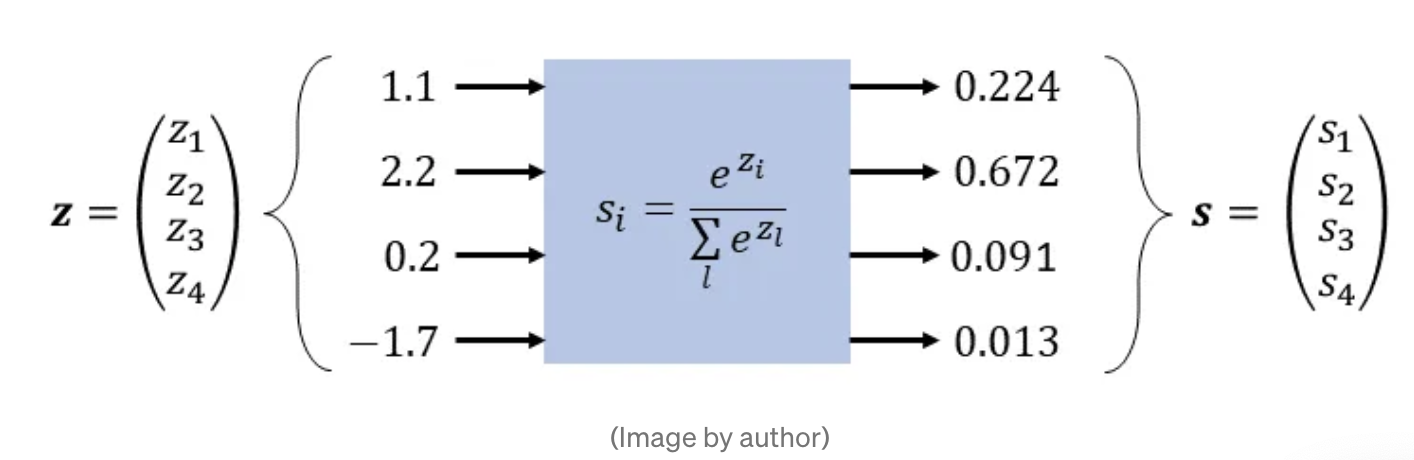

https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1


In [ ]:
import torchvision.datasets as datasets 
import torch as t
import torchvision.transforms as transform
import torch.nn as nn
import matplotlib.pyplot as plt
transform = transform.Compose([transform.ToTensor(), transform.Normalize((0.5,), (0.5,)),])
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = t.utils.data.DataLoader(mnist_trainset, batch_size=1, shuffle=True)

mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = t.utils.data.DataLoader(mnist_testset, batch_size=1, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
train_images=[]
train_labels=[]

for images, labels in train_loader:
  image = images.reshape(images.shape[0],-1)
  image = image.numpy()
  train_images.append(image)
  labels = labels.numpy()
  train_labels.append(labels)


test_images=[]
test_labels=[]

for images, labels in test_loader:
  image = images.reshape(images.shape[0],-1)
  image = image.numpy()
  test_images.append(image)
  labels = labels.numpy()
  test_labels.append(labels)




In [ ]:
print(len(test_images), len(train_images))


10000 60000


In [ ]:
import numpy as np
test_labels=np.array(test_labels)
train_labels=np.array(train_labels)
train_images = np.array(train_images)
test_images = np.array(test_images)

In [ ]:
def one_hot(y):
  table = np.zeros((y.shape[0], 10))
  for i in range(y.shape[0]):
    table[i][int(y[i][0])] = 1
  return table

train_labels=one_hot(train_labels)
test_labels=one_hot(test_labels)

In [ ]:
test_images= test_images.reshape(test_images.shape[0], test_images.shape[2])
train_images= train_images.reshape(train_images.shape[0], train_images.shape[2])

In [ ]:
import pandas as pd
df1 = pd.DataFrame()
df2 = pd.DataFrame()
train_df = pd.concat([df1, pd.DataFrame(train_images)], axis=1)
test_df = pd.concat([df2, pd.DataFrame(test_images)], axis=1)

Epoch #  0
Loss after epoch #  0  :  0.03183607773368656
Accuracy after epoch #  0  :  77.31833333333333
Epoch #  1
Loss after epoch #  1  :  0.01945802320737459
Accuracy after epoch #  1  :  86.78666666666666
Epoch #  2
Loss after epoch #  2  :  0.01692598757021161
Accuracy after epoch #  2  :  88.6
Epoch #  3
Loss after epoch #  3  :  0.015656966508947087
Accuracy after epoch #  3  :  89.52333333333333
Epoch #  4
Loss after epoch #  4  :  0.014743160466507015
Accuracy after epoch #  4  :  90.07166666666667
Epoch #  5
Loss after epoch #  5  :  0.014220740179496564
Accuracy after epoch #  5  :  90.53333333333333
Epoch #  6
Loss after epoch #  6  :  0.013887928440177388
Accuracy after epoch #  6  :  90.725
Epoch #  7
Loss after epoch #  7  :  0.013448183857617702
Accuracy after epoch #  7  :  91.05
Epoch #  8
Loss after epoch #  8  :  0.012764475149834403
Accuracy after epoch #  8  :  91.38166666666666
Epoch #  9
Loss after epoch #  9  :  0.012017855510944586
Accuracy after epoch #  9  

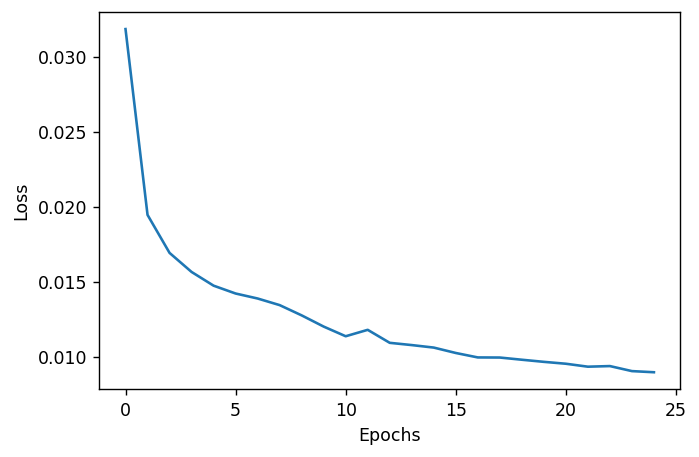

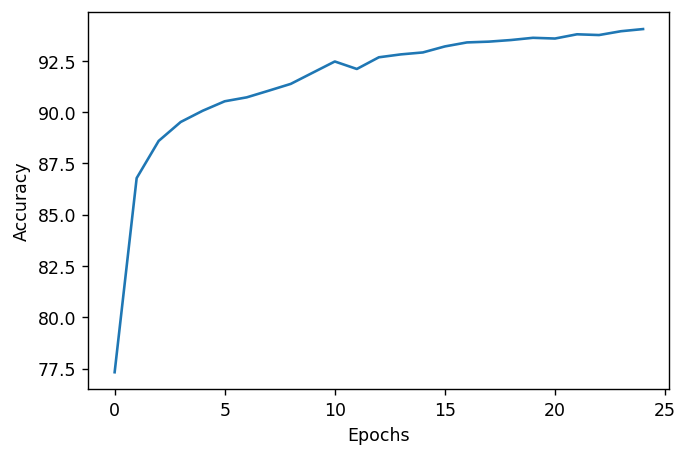

In [ ]:
import numpy as np
class NeuralNetwork:
    def __init__(self, X, y, batch = 1, lr = 1e-2,  epochs = 25):
        self.input = X 
        self.target = y
        self.batch = batch
        self.epochs = epochs
        self.lr = lr
        
        self.x = self.input[:self.batch] # batch input 
        self.y = self.target[:self.batch] # batch target value
        self.loss = []
        self.acc = []
        
        self.init_weights()
      
    def init_weights(self):
        self.W1 = np.random.randn(self.input.shape[1],300)
        self.W2 = np.random.randn(self.W1.shape[1],200)
        self.W3 = np.random.randn(self.W2.shape[1],self.y.shape[1])


    def ReLU(self, x):
        return np.maximum(0,x)

    def dReLU(self,x):
        return 1 * (x > 0)

    def Sigmoid(self, x):
        return 1/(np.exp(-x)+1) 

    def dSigmoid(self,x):
        return (np.exp(-x))/((np.exp(-x)+1)**2)
    
    def softmax(self, z):
        z = z - np.max(z, axis = 1).reshape(z.shape[0],1)
        return np.exp(z) / np.sum(np.exp(z), axis = 1).reshape(z.shape[0],1)
    
    def shuffle(self):
        idx = [i for i in range(self.input.shape[0])]
        np.random.shuffle(idx)
        self.input = self.input[idx]
        self.target = self.target[idx]
        
    def feedforward(self):
        assert self.x.shape[1] == self.W1.shape[0]
        self.z1 = self.x.dot(self.W1)
        self.a1 = self.Sigmoid(self.z1)

        assert self.a1.shape[1] == self.W2.shape[0]
        self.z2 = self.a1.dot(self.W2)
        self.a2 = self.Sigmoid(self.z2)

        assert self.a2.shape[1] == self.W3.shape[0]
        self.z3 = self.a2.dot(self.W3)
        self.a3 = self.softmax(self.z3)
        self.error = self.a3 - self.y

        
    def backprop(self):
        dcost = (1/self.batch)*self.error
        
        DW3 = np.dot(dcost.T,self.a2).T
        DW2 = np.dot((np.dot((dcost),self.W3.T) * self.Sigmoid(self.z2)).T,self.a1).T
        DW1 = np.dot((np.dot(np.dot((dcost),self.W3.T)*self.dSigmoid(self.z2),self.W2.T)*self.dSigmoid(self.z1)).T,self.x).T

        db3 = np.sum(dcost,axis = 0)
        db2 = np.sum(np.dot((dcost),self.W3.T) * self.dSigmoid(self.z2),axis = 0)
        db1 = np.sum((np.dot(np.dot((dcost),self.W3.T)*self.dSigmoid(self.z2),self.W2.T)*self.dSigmoid(self.z1)),axis = 0)
        
        assert DW3.shape == self.W3.shape
        assert DW2.shape == self.W2.shape
        assert DW1.shape == self.W1.shape

        
        self.W3 = self.W3 - self.lr * DW3
        self.W2 = self.W2 - self.lr * DW2
        self.W1 = self.W1 - self.lr * DW1


    def train(self):
        for epoch in range(self.epochs):
            print("Epoch # ", epoch)
            l = 0
            acc = 0
            self.shuffle()
            
            for batch in range(self.input.shape[0]):
                start = batch*self.batch
                end = (batch+1)*self.batch
                self.x = self.input[start:end]
                self.y = self.target[start:end]
                self.feedforward()
                self.backprop()
                l+=np.mean(self.error**2)
                acc+= np.count_nonzero(np.argmax(self.a3,axis=1) == np.argmax(self.y,axis=1)) / self.batch
                
            self.loss.append(l/(self.input.shape[0]//self.batch))
            self.acc.append(acc*100/(self.input.shape[0]//self.batch))
            print("Loss after epoch # ", epoch, " : ", self.loss[-1])
            print("Accuracy after epoch # ", epoch, " : ", self.acc[-1])
            
    def plot(self):
        plt.figure(dpi = 125)
        plt.plot(self.loss)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
    
    def acc_plot(self):
        plt.figure(dpi = 125)
        plt.plot(self.acc)
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        
    def test(self,xtest,ytest):
        self.x = xtest
        self.y = ytest
        self.feedforward()
        acc = np.count_nonzero(np.argmax(self.a3,axis=1) == np.argmax(self.y,axis=1)) / self.x.shape[0]
        loss = np.count_zero(np.argmax(self.a3,axis=1) == np.argmax(self.y,axis=1)) / self.x.shape[0]
        print("Test Accuracy:", 100 * acc, "%")
        print("Test Loss:", 100 * loss, "%")
    
        
        
NN = NeuralNetwork(train_images,train_labels) 
NN.train()
NN.plot()
NN.test(test_images,test_labels)
NN.acc_plot()


####Library Implementation

In [86]:
# acquire MNIST data
from tensorflow.keras.datasets import mnist
import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# reshape data for an MLP input
import numpy as np

train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))

# normalize data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# convert labels to a one-hot vector
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 [==============================] - 0s 0us/step


In [88]:
# define network architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense

MLP = Sequential()
MLP.add(InputLayer(input_shape=(784, ))) # input layer
MLP.add(Dense(300, activation='sigmoid')) # hidden layer 1
MLP.add(Dense(200, activation='sigmoid')) # hidden layer 2
MLP.add(Dense(10, activation='softmax')) # output layer

# summary
MLP.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 200)               60200     
                                                                 
 dense_5 (Dense)             (None, 10)                2010      
                                                                 
Total params: 297,710
Trainable params: 297,710
Non-trainable params: 0
_________________________________________________________________


In [90]:
# optimization
MLP.compile(loss='categorical_crossentropy',
            optimizer='SGD',
            metrics=['accuracy'])

In [114]:
history = MLP.fit(train_images, train_labels, 
        epochs=20, batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3499 - accuracy: 0.9008
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3394 - accuracy: 0.9029
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3307 - accuracy: 0.9056
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3230 - accuracy: 0.9073
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3167 - accuracy: 0.9086
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3106 - accuracy: 0.9109
Epoch 7/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3050 - accuracy: 0.9122
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3004 - accuracy: 0.9132
Epoch 9/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2958 - accuracy: 0.9146
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2

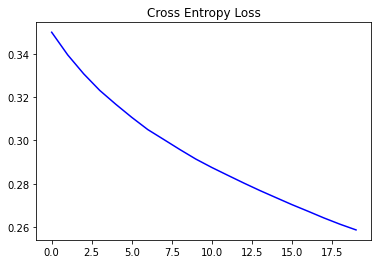

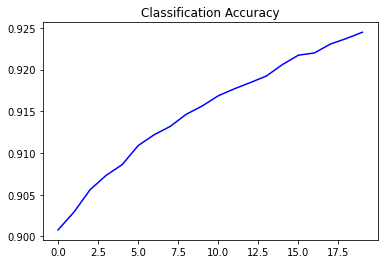

In [115]:

plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.show()
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
#plt.plot(histories.history['val_accuracy'], color='orange', label='test')
plt.show()

In [116]:
# evaluate performance
test_loss, test_acc = MLP.evaluate(test_images, test_labels,
                                   batch_size=64,
                                   verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.25232836604118347
Test accuracy: 0.9265000224113464
